<a href="https://colab.research.google.com/github/AYMAN-CHAREF/computer-vision/blob/main/TP4_Classification_de_la_BD_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import mnist


In [12]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_test), np.shape (y_test))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


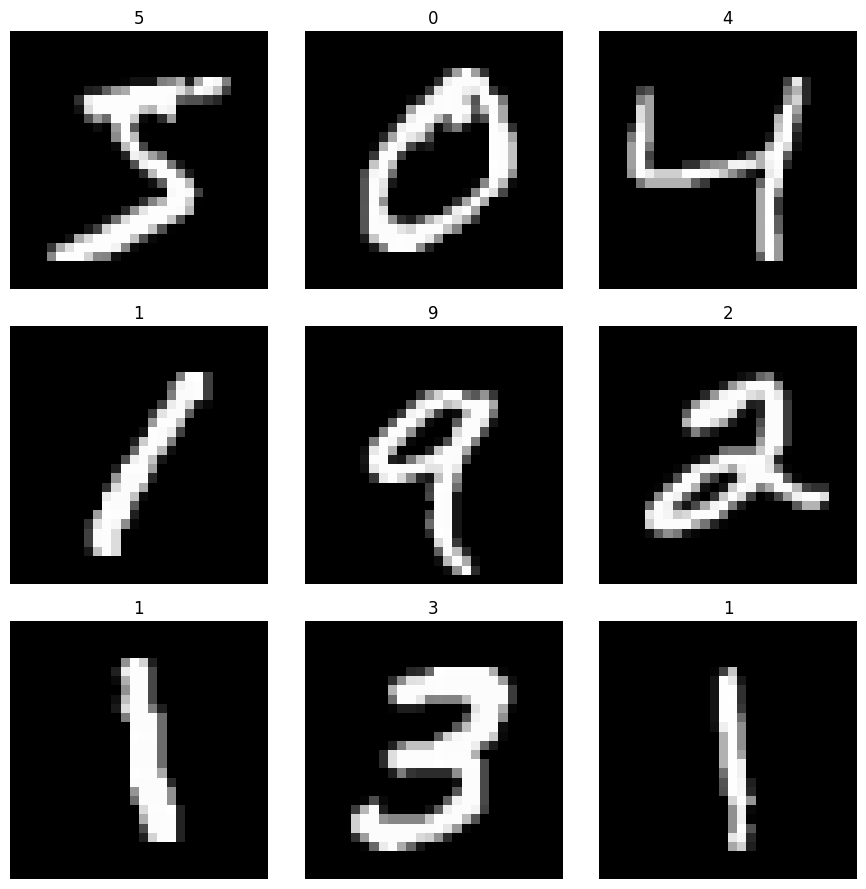

In [3]:
plt.rcParams["figure.figsize"] = [9., 9.]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
for ax,j in zip(axs, range(9)):
  ax.axis("off")

  ax.imshow(x_train[j], cmap='gray')
  ax.set_title(str(y_train[j]))


plt.show()

In [13]:
x_train_v=np.reshape(x_train,[60000,784])/255.
x_test_v=np.reshape(x_test,[10000,784])/255.

print(np.shape(x_train_v))
print(np.shape(x_test_v))

(60000, 784)
(10000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

print("avant", np.shape(y_train), "apres", np.shape(y_train_c))

print("Avant", y_train[10])
print("Apres", y_train_c[10])


avant (60000,) apres (60000, 10)
Avant 3
Apres [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [6]:
def perceptron_monocouche():
  inp=Input (shape = (784,))
  outp=Dense(10, activation="softmax") (inp)

  model=Model(inp,outp)

  model.summary()
  return model

In [15]:
fc="categorical_crossentropy"

In [37]:
optim=tf.keras.optimizers.Adam(learning_rate=0.001)

In [9]:
model=perceptron_monocouche()
model.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
hist=model.fit(x_train_v, y_train_c, validation_data=(x_test_v, y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2004 - loss: 2.2534 - val_accuracy: 0.5271 - val_loss: 1.8346
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5778 - loss: 1.7482 - val_accuracy: 0.6938 - val_loss: 1.4886
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7068 - loss: 1.4428 - val_accuracy: 0.7541 - val_loss: 1.2637
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7516 - loss: 1.2430 - val_accuracy: 0.7847 - val_loss: 1.1109
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7794 - loss: 1.0992 - val_accuracy: 0.8039 - val_loss: 1.0017
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7981 - loss: 0.9977 - val_accuracy: 0.8171 - val_loss: 0.9204
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8130 - loss: 0.9242 - val_accuracy: 0.8265 - val_loss: 0.8575
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8202 - loss: 0.8643 - val_accu

-sigmoid fait une classification binaire, il donne la probabilte d'appartennace a une classe
-Relu
-sigmoid: classification binaire.
-softmax: classification multiclass

In [104]:
def perceptron_multicouche_sig():
  model = Sequential()
  model.add(Input(shape=(784,)))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model


In [35]:
model=perceptron_multicouche_sig()
model.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
hist=model.fit(x_train_v, y_train_c, validation_data=(x_test_v, y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 60)             │         6,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,300 (723.83 KB)

 Trainable params: 185,300 (723.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1063 - loss: 2.3077 - val_accuracy: 0.1354 - val_loss: 2.2203
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1529 - loss: 2.1927 - val_accuracy: 0.2561 - val_loss: 2.0885
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2951 - loss: 2.0514 - val_accuracy: 0.4001 - val_loss: 1.8938
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4191 - loss: 1.8433 - val_accuracy: 0.4722 - val_loss: 1.6517
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4814 - loss: 1.6003 - val_accuracy: 0.5421 - val_loss: 1.4013
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5714 - loss: 1.3454 - val_accuracy: 0.6951 - val_loss: 1.1423
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7130 - loss: 1.0984 - val_accuracy: 0.7686 - val_loss: 0.9307
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7755 - loss: 0.9063 - val_accu

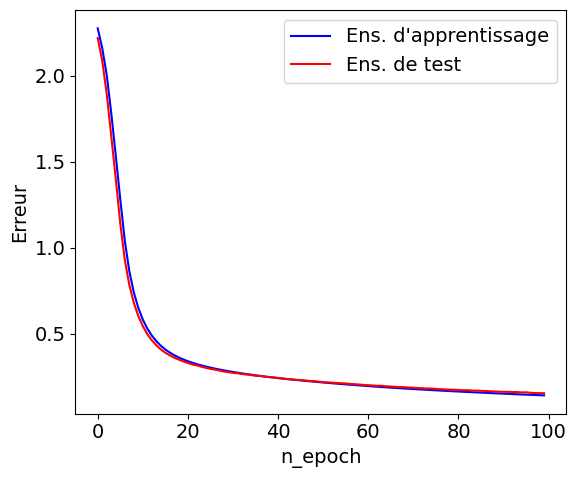

In [37]:
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size':14})
plt.plot(hist.history["loss"],c='b', label="Ens. d'apprentissage")
plt.plot(hist.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Erreur")
plt.legend()
plt.show()

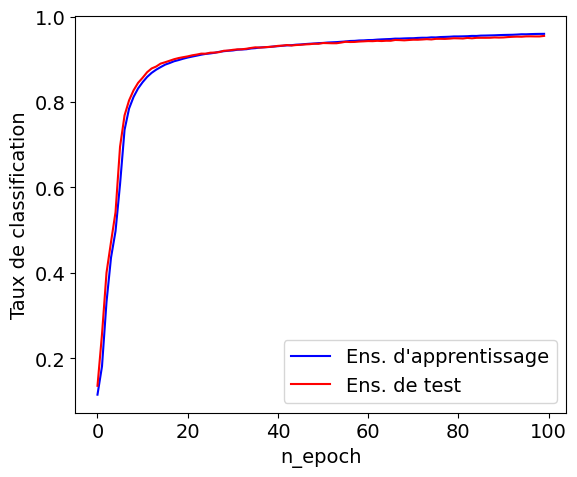

In [42]:
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size':14})
plt.plot(hist.history["accuracy"],c='b', label="Ens. d'apprentissage")
plt.plot(hist.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Taux de classification")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


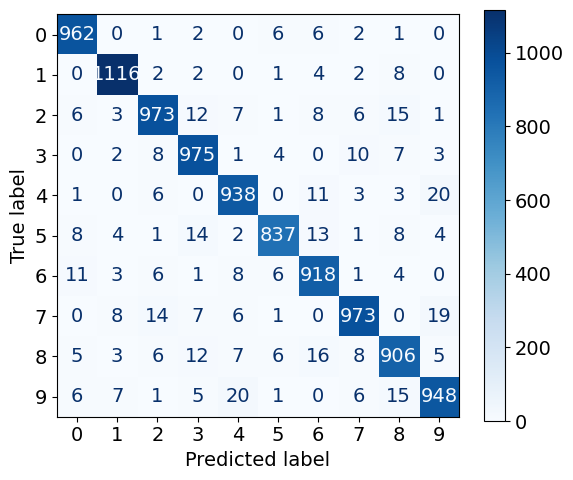

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cla=["0","1","2","3","4","5","6","7","8","9"]
y_pred=model.predict(x_test_v)
cm=confusion_matrix(y_test,np.argmax(y_pred,axis=-1))
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cla)
disp.plot(cmap=plt.cm.Blues)
plt.show()

on utilise dropout pour penaliser un certaine nomber de neurons (elimination)


In [38]:
def perceptron_multicouche_sig():
  model = Sequential()
  model.add(Input(shape=(784,)))
  model.add(Dense(500, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model


In [39]:
model=perceptron_multicouche_sig()
model.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
hist=model.fit(x_train_v, y_train_c, validation_data=(x_test_v, y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 60)             │        12,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,900 (1.93 MB)

 Trainable params: 506,900 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8515 - loss: 0.4764 - val_accuracy: 0.9650 - val_loss: 0.1121
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9708 - loss: 0.0935 - val_accuracy: 0.9706 - val_loss: 0.0927
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0588 - val_accuracy: 0.9763 - val_loss: 0.0833
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0450 - val_accuracy: 0.9756 - val_loss: 0.0875
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9793 - val_loss: 0.0728
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9724 - val_loss: 0.1056
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9808 - val_loss: 0.0672
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accu